In [40]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
import joblib as jl
import pickle

In [3]:
df = pd.read_csv('cardio-train-edited.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.iloc[:,12:]

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
69995,0
69996,1
69997,1
69998,1


In [5]:
df.drop(['id'],axis = 'columns')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [6]:
corrected_col = ['age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','alco','active','cardio']
df=df[corrected_col]

In [7]:
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,1,1
69997,19066,2,183,105.0,180,90,3,1,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,1


In [8]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
alco           0
active         0
cardio         0
dtype: int64

In [9]:
x=df.drop(['cardio'],axis = 'columns')
y=df.cardio

In [10]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,alco,active
0,18393,2,168,62.0,110,80,1,1,0,1
1,20228,1,156,85.0,140,90,3,1,0,1
2,18857,1,165,64.0,130,70,3,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,1
4,17474,1,156,56.0,100,60,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,1
69997,19066,2,183,105.0,180,90,3,1,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0


In [11]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2)

# Logistic Regression

In [12]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)

C:\Users\Kousimon\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [13]:
log_reg.score(X_test,Y_test)

0.6894285714285714

# SVM(Support Vector Machine)

In [14]:
svm_class=SVC(C=10)
svm_class.fit(X_train,Y_train)

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
svm_class.score(X_test,Y_test)

0.635

# Decision Tree Classifier

In [16]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt']
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, Y_train)



C:\Users\Kousimon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
97 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Kousimon\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Kousimon\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
  File "C:\Users\Kousimon\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 469, in _validate_para

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, ...], 'max_features': [None, 'auto', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'entropy'


In [17]:
print("Best DT params:", grid_dt.best_params_)
print("Best DT score:", grid_dt.best_score_)

Best DT params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best DT score: 0.7317142857142857


In [18]:
grid_dt.score(X_test,Y_test)

0.7322142857142857

# Random Forest Classifier 


In [19]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'class_weight': [None, 'balanced']  # Handle imbalance if any
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'class_weight': None, 'max_depth': 10, 'n_estimators': 100}

In [20]:
best_model = grid_search.best_estimator_
best_model

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
best_model.fit(X_train, Y_train)
best_model.score(X_test,Y_test)

0.7347142857142858

In [22]:
cv_scores = cross_val_score(best_model, X_train, Y_train, cv=5)
print("CV Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

CV Accuracy Scores: [0.74044643 0.735625   0.73107143 0.734375   0.74008929]
Mean CV Accuracy: 0.7363214285714286


In [23]:
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(Y_test, y_pred))
print("Classification Report:\n", classification_report(Y_test, y_pred))


Test Accuracy: 0.7347142857142858
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      7012
           1       0.76      0.69      0.72      6988

    accuracy                           0.73     14000
   macro avg       0.74      0.73      0.73     14000
weighted avg       0.74      0.73      0.73     14000



# Naive Bayes Classifier 

In [24]:
param_grid_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

gnb = GaussianNB()
grid_gnb = GridSearchCV(gnb, param_grid_gnb, cv=5, scoring='accuracy')
grid_gnb.fit(X_train, Y_train)

,estimator,GaussianNB()
,param_grid,"{'var_smoothing': [1e-09, 1e-08, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


In [25]:
print("Best GaussianNB params:", grid_gnb.best_params_)
print("Best GaussianNB score:", grid_gnb.best_score_)

Best GaussianNB params: {'var_smoothing': 1e-09}
Best GaussianNB score: 0.5897678571428571


# KNN Classfier

In [28]:
param_grid_knn = {
    'n_neighbors': [3, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'kd_tree'],
    'p': [1, 2]  # 1=Manhattan, 2=Euclidean distance
}

knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train, Y_train)


,estimator,KNeighborsClassifier()
,param_grid,"{'algorithm': ['auto', 'kd_tree'], 'n_neighbors': [3, 5, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,10


In [29]:

print("Best KNN params:", grid_knn.best_params_)
print("Best KNN score:", grid_knn.best_score_)

Best KNN params: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
Best KNN score: 0.7000714285714286


In [31]:
grid_knn.score(X_test,Y_test)

0.6956428571428571

In [32]:
v=df.corr()

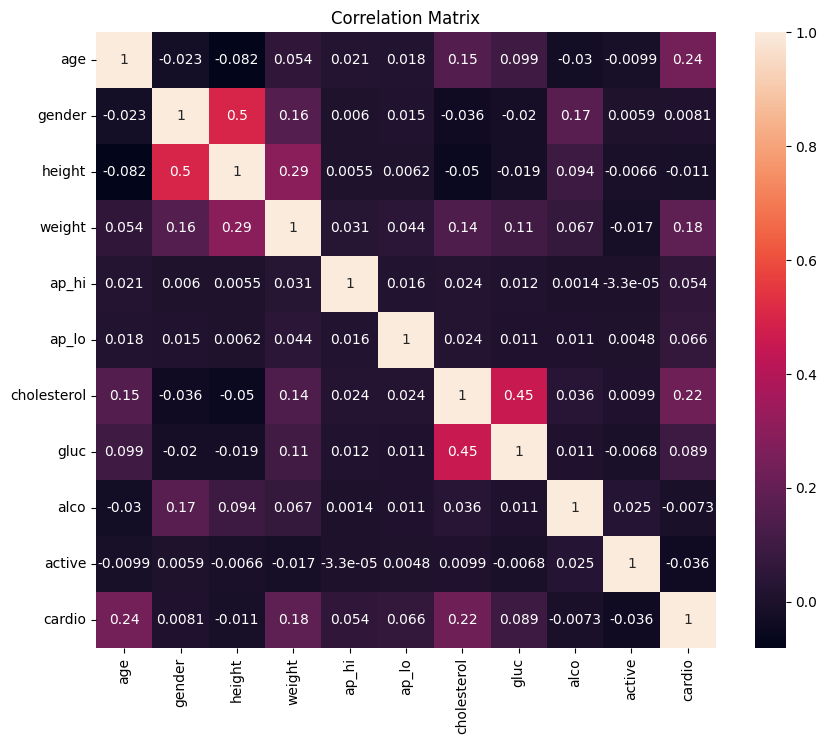

In [33]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.heatmap(v,annot=True)
plt.title('Correlation Matrix')
plt.show()

# Model Evaluation

In [36]:
print(X_test.head())
y_pred = grid_knn.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)

acc_score = accuracy_score(Y_test, y_pred)

mse , acc_score

         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  alco  \
40801  18551       1     157    82.0    120     80            1     1     0   
49142  22551       1     158    45.0    110     70            1     1     0   
24748  18466       1     168    69.0    120     80            1     1     0   
7008   19666       1     180    68.0    100     70            1     1     0   
16624  20210       1     165    85.0    130     80            2     1     0   

       active  
40801       1  
49142       0  
24748       1  
7008        1  
16624       1  


(0.3043571428571429, 0.6956428571428571)

In [38]:
grid_knn.score(X_test,Y_test)

0.6956428571428571

In [41]:
jl.dump(grid_knn,'Prediction_model.pkl')


['Prediction_model.pkl']

# Visualisation 

[]

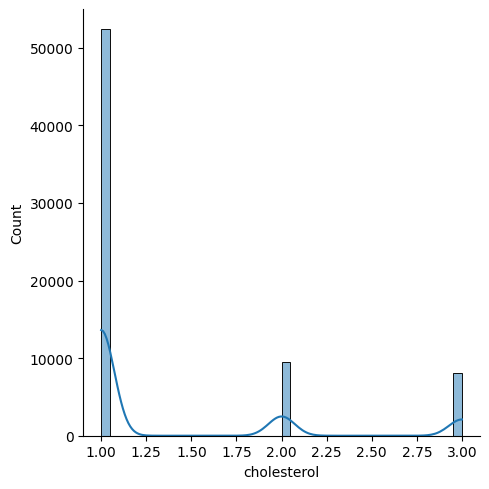

In [42]:
sns.displot(df['cholesterol'],kde=True)
plt.plot()

[]

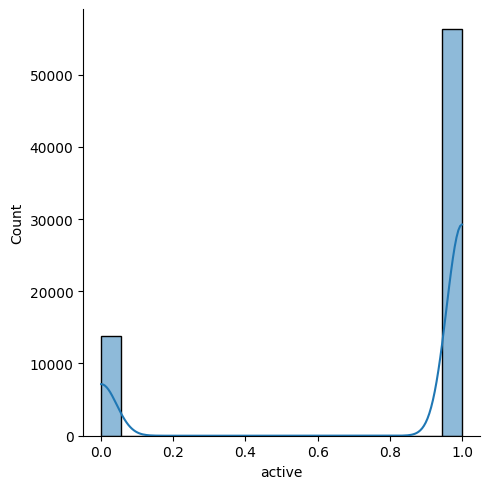

In [43]:
sns.displot(df['active'],kde=True)
plt.plot()

[]

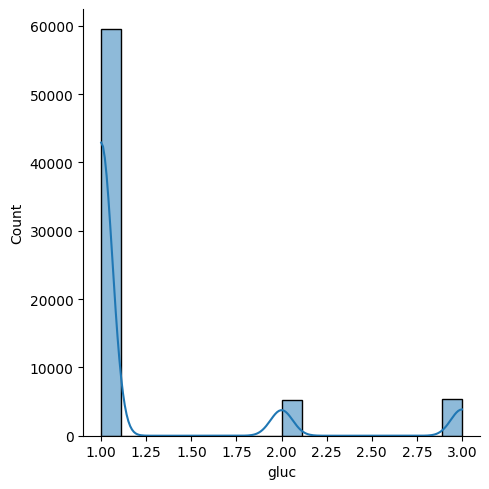

In [44]:
sns.displot(df['gluc'],kde=True)
plt.plot()

In [ ]:
sns.displot(df['ap_hi'],kde=True)
plt.plot()